### Problem Statement - 
To predict the fire forest burn area

In [11]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random



In [12]:
db = pd.read_csv('forest_fires.csv')

In [13]:
db.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [14]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E055DC17B8>,
      dtype=object)

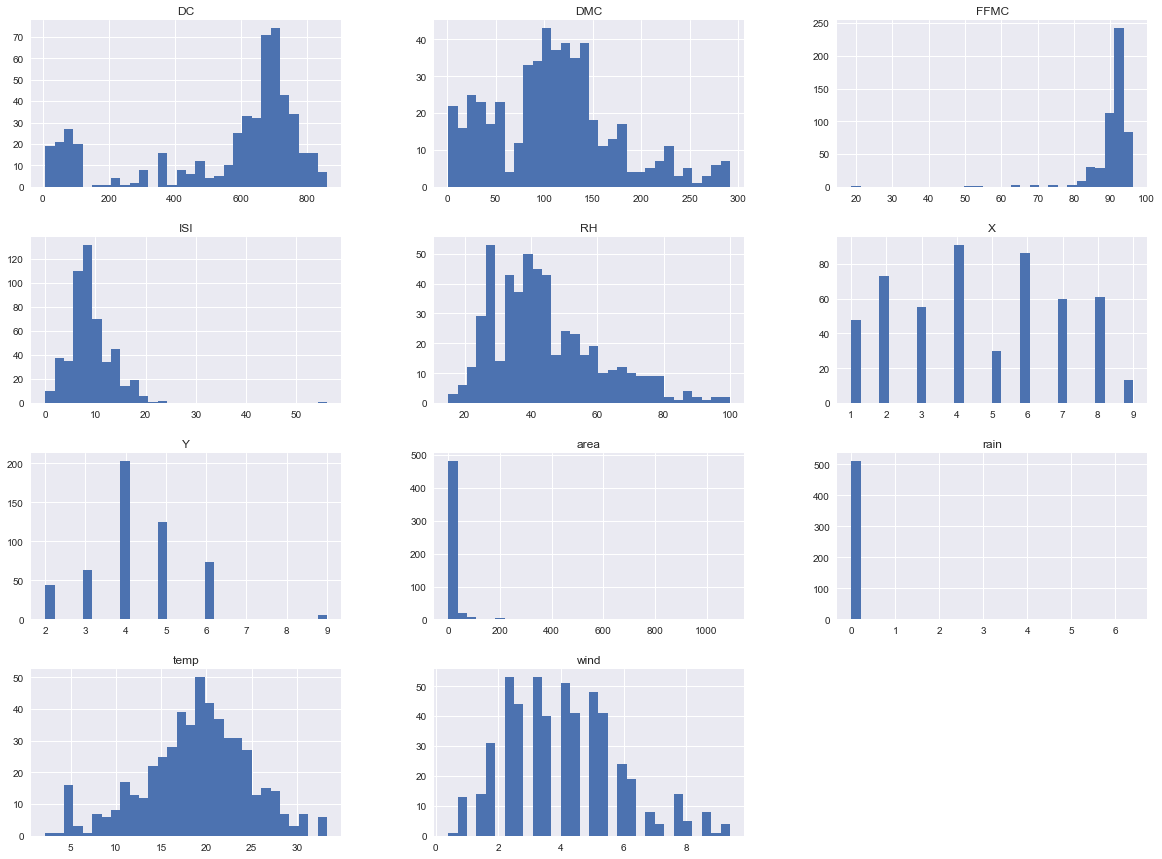

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
db.hist(bins=30, figsize=(20,15)) # plotting the histogram

In [16]:
db.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
db.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [17]:
db.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [18]:
db.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [19]:
db.describe() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(db, test_size=0.2, random_state=42)
work_set = train_set.copy()

In [22]:
train_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,4,3,9,6,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,9,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,5,4,2,7,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


In [23]:
test_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
304,6,5,5,6,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
501,7,5,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
441,8,6,8,1,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23
153,5,4,9,5,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46
503,2,4,8,3,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95


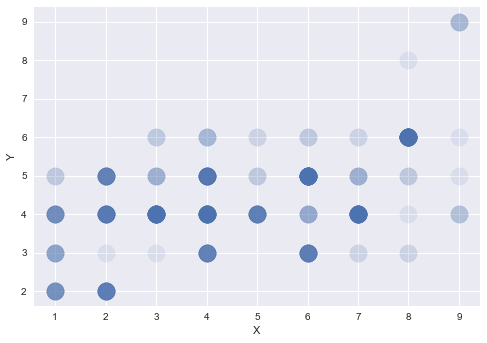

In [25]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) 

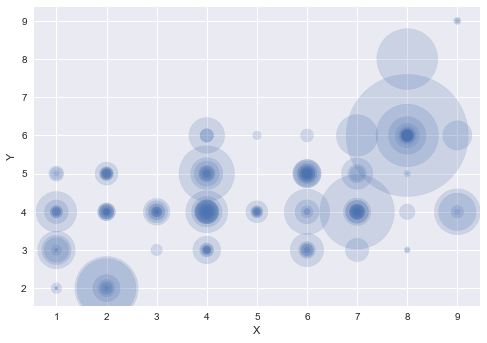

In [26]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*work_set['area']) 

In [27]:
x_values = list(work_set['X'])
y_values = list(work_set['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []
    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)


In [28]:

def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

In [29]:
work_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,4,3,9,6,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,9,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,5,4,2,7,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05E8B4278>]],
      dtype=object)

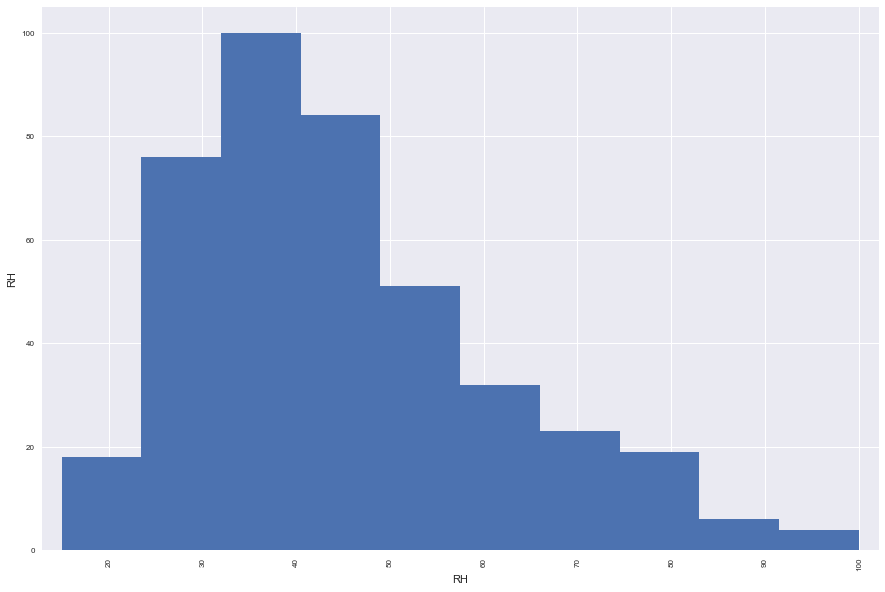

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['RH']
scatter_matrix(work_set[attributes], figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05E96EEB8>]],
      dtype=object)

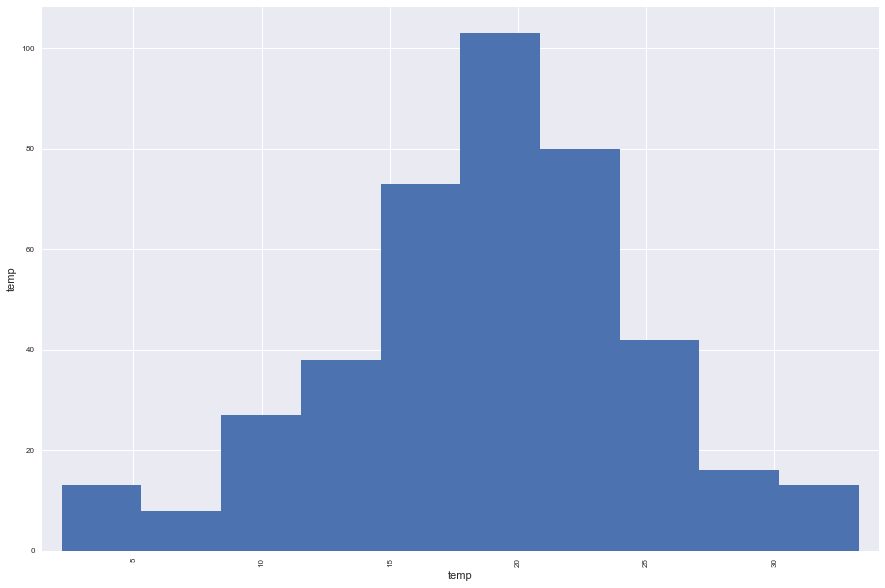

In [31]:
from pandas.plotting import scatter_matrix

attributes = ['temp']
scatter_matrix(work_set[attributes], figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05E96EE48>]],
      dtype=object)

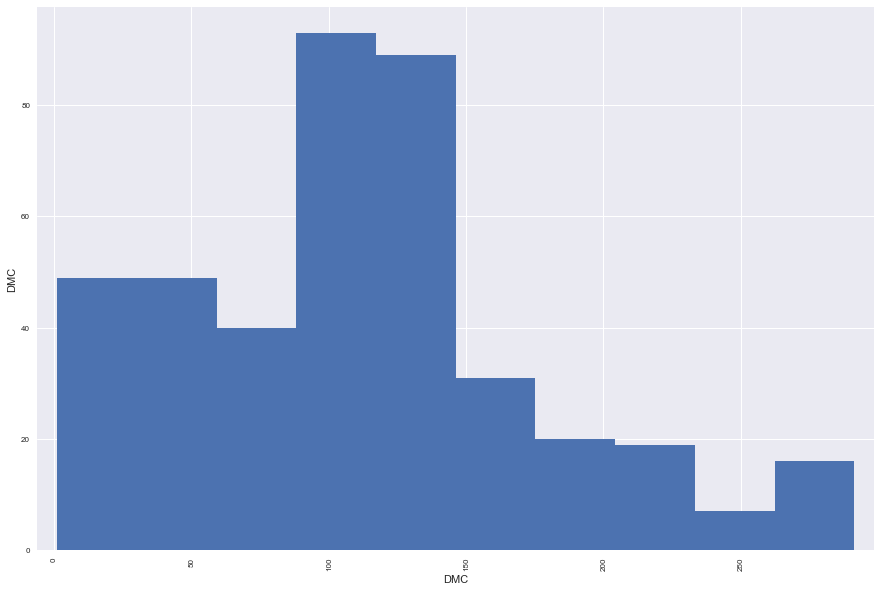

In [32]:
from pandas.plotting import scatter_matrix

attributes = ['DMC']
scatter_matrix(work_set[attributes], figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05EC31128>]],
      dtype=object)

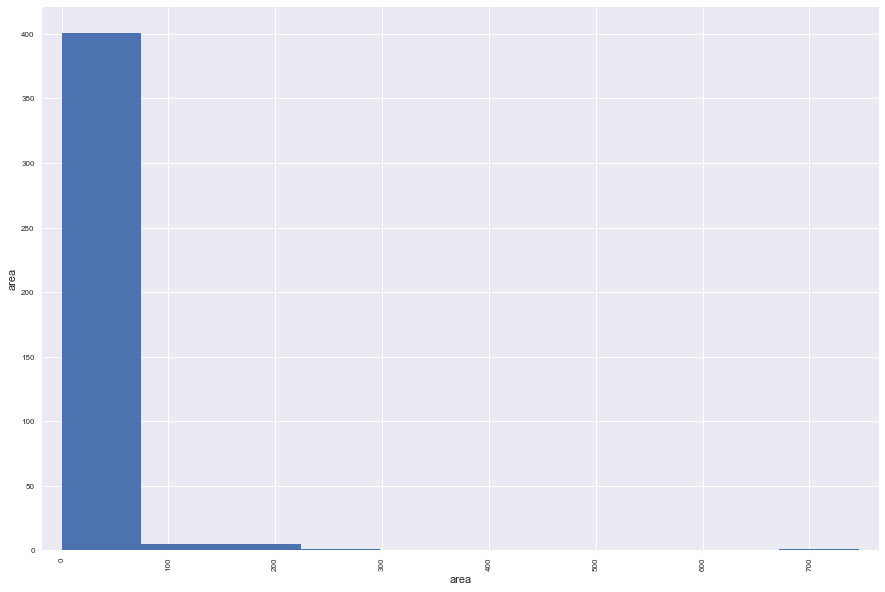

In [33]:
from pandas.plotting import scatter_matrix

attributes = ['area']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [34]:
db['month'].unique()

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11], dtype=int64)

In [35]:
db['day'].unique()

array([5, 2, 6, 7, 1, 3, 4], dtype=int64)

In [36]:
db['area'].unique()

array([0.00000e+00, 3.60000e-01, 4.30000e-01, 4.70000e-01, 5.50000e-01,
       6.10000e-01, 7.10000e-01, 7.70000e-01, 9.00000e-01, 9.50000e-01,
       9.60000e-01, 1.07000e+00, 1.12000e+00, 1.19000e+00, 1.36000e+00,
       1.43000e+00, 1.46000e+00, 1.56000e+00, 1.61000e+00, 1.63000e+00,
       1.64000e+00, 1.69000e+00, 1.75000e+00, 1.90000e+00, 1.94000e+00,
       1.95000e+00, 2.01000e+00, 2.14000e+00, 2.29000e+00, 2.51000e+00,
       2.53000e+00, 2.55000e+00, 2.57000e+00, 2.69000e+00, 2.74000e+00,
       3.07000e+00, 3.50000e+00, 4.53000e+00, 4.61000e+00, 4.69000e+00,
       4.88000e+00, 5.23000e+00, 5.33000e+00, 5.44000e+00, 6.38000e+00,
       6.83000e+00, 6.96000e+00, 7.04000e+00, 7.19000e+00, 7.30000e+00,
       7.40000e+00, 8.24000e+00, 8.31000e+00, 8.68000e+00, 8.71000e+00,
       9.41000e+00, 1.00100e+01, 1.00200e+01, 1.09300e+01, 1.10600e+01,
       1.12400e+01, 1.13200e+01, 1.15300e+01, 1.21000e+01, 1.30500e+01,
       1.37000e+01, 1.39900e+01, 1.45700e+01, 1.54500e+01, 1.720

In [37]:
# defining the method for plotting the histogram
def histogram_plot(db, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(db, edgecolor='black', linewidth=1.2)
    plt.show()

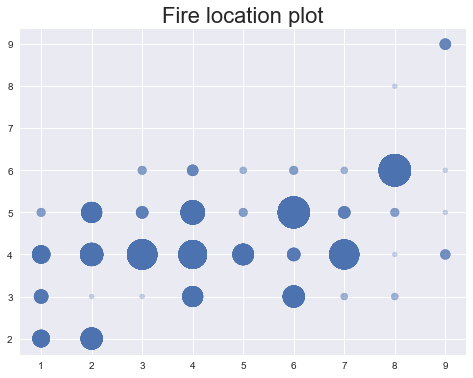

In [38]:
# Scattering the plot with the help of the location

plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()



In [39]:

from sklearn.preprocessing import LabelEncoder

month_encoder = LabelEncoder()
day_encoder = LabelEncoder()

months = db['month']
days = db['day']

month_1hot = month_encoder.fit_transform(months) # label encoding month
day_1hot = day_encoder.fit_transform(days) # label encoding day

###### Seeing the data after label encoding

In [41]:
month_1hot

array([ 2,  9,  9,  2,  2,  7,  7,  7,  8,  8,  8,  8,  7,  8,  8,  8,  2,
        9,  2,  3,  8,  8,  5,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  9,  9,  9,  2,  6,  7,  7,  8,  8,  8,  8,  6,  2,  2,  8,
        7,  7,  7,  7,  8,  8,  9,  1,  1,  2,  2,  7,  7,  7,  7,  8,  8,
        8,  2,  2,  8,  2,  7,  8,  1,  1,  2,  7,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  2,  7,  2,  7,  7,  7,  8,  1,  2,  7,  7,  7,  7,
        7,  8,  0,  2,  2,  7,  8,  8,  2,  2,  8,  8,  2,  2,  2,  2,  2,
        7,  7,  7,  8,  8,  8,  9,  2,  8,  9,  9,  1,  2,  2,  8,  2,  7,
        8,  8,  6,  8,  8,  7,  7,  6,  7,  7,  2,  8,  7,  8,  5,  6,  6,
        8,  8,  7,  8,  7,  7,  8,  2,  7,  2,  8,  8,  2,  7,  7,  2,  7,
        8,  7,  7,  8,  7,  7,  3,  7,  8,  7,  8,  9,  1,  9,  7,  8,  2,
        8,  2,  2,  2,  7,  7,  8,  7,  7,  3,  8,  8,  8,  8,  2,  1,  9,
        2,  8,  7,  8,  8,  8,  9,  7,  8,  2,  2,  2,  8,  8,  8,  2,  7,
        8,  2,  6,  8,  8

In [42]:
day_1hot

array([4, 1, 5, 4, 6, 6, 0, 0, 1, 5, 5, 5, 4, 0, 2, 4, 5, 0, 2, 5, 1, 0,
       6, 5, 5, 6, 4, 0, 5, 6, 4, 0, 4, 6, 0, 1, 1, 4, 5, 1, 1, 5, 1, 5,
       2, 2, 0, 0, 0, 0, 3, 6, 2, 2, 3, 3, 1, 6, 0, 4, 6, 6, 3, 6, 0, 3,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 3, 4, 0, 4, 1, 6, 6, 1, 2, 3, 3, 3, 3,
       6, 5, 5, 4, 6, 6, 0, 6, 5, 5, 6, 6, 6, 1, 1, 5, 5, 4, 3, 6, 5, 0,
       4, 4, 6, 0, 1, 1, 5, 5, 0, 3, 0, 0, 6, 1, 4, 6, 0, 4, 2, 6, 5, 0,
       6, 3, 1, 5, 6, 0, 1, 1, 0, 2, 4, 5, 2, 3, 0, 1, 1, 3, 4, 6, 5, 4,
       5, 6, 5, 2, 2, 4, 0, 3, 5, 5, 6, 3, 2, 2, 4, 3, 2, 2, 6, 0, 5, 5,
       3, 6, 2, 1, 6, 0, 6, 0, 4, 1, 6, 0, 5, 6, 4, 3, 1, 2, 1, 4, 3, 3,
       1, 0, 1, 6, 6, 2, 5, 3, 5, 1, 4, 3, 5, 5, 4, 0, 5, 5, 6, 0, 2, 0,
       6, 4, 0, 4, 2, 6, 0, 5, 6, 5, 2, 6, 1, 1, 5, 6, 5, 1, 5, 6, 2, 4,
       6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 3, 3, 3, 5, 5, 5, 5, 0, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 3, 0, 0, 0, 0, 4, 1, 6, 2, 4, 6,
       2, 5, 5, 5, 5, 5, 4, 1, 1, 6, 6, 6, 2, 5, 0,

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = db.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [44]:
scaled_features

array([[ 1.00831277,  0.56986043, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 1.00831277, -0.24400101, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [-1.58736044, -0.24400101,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 0.57570057, -1.05786246, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

# defining the methods  for the AttributeSelector
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [46]:
from sklearn.pipeline import Pipeline


numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'] # Selecting the numerical columns
categorical_attributes = ['month', 'day'] # # Selecting the categorical columns
categorical_classes = np.concatenate((db['month'].unique(), db['day'].unique()), axis=0)

# creating the separate numerical and categorical pipelines
numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])

NameError: name 'CustomBinarizer' is not defined

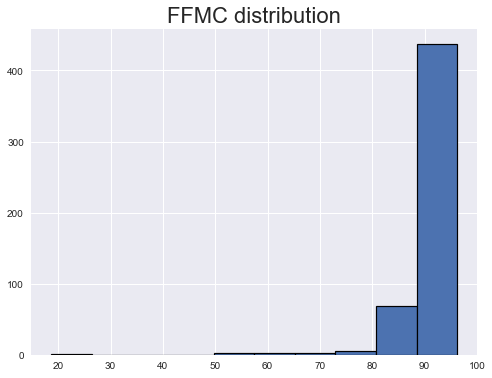

In [47]:
#FFMC distrubution
#  Creating Histogram based on FFMC attribute
histogram_plot(db['FFMC'], title = "FFMC distribution")
plt.show()

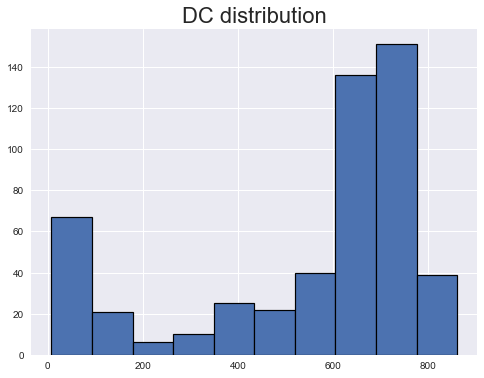

In [48]:
#DC distrubution
#  Creating Histogram based on DC attribute 
histogram_plot(db['DC'], title = "DC distribution")
plt.show()

In [50]:
X = db.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].values
Y = db.iloc[:, 11].values

In [51]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

In [52]:
train_x

array([[ 7. ,  4. ,  9. , ..., 44. ,  2.2,  0. ],
       [ 4. ,  3. ,  8. , ..., 42. ,  4.9,  0. ],
       [ 1. ,  5. ,  9. , ..., 27. ,  3.1,  0. ],
       ...,
       [ 7. ,  5. ,  8. , ..., 65. ,  4.9,  0.8],
       [ 3. ,  4. ,  9. , ..., 57. ,  4.5,  0. ],
       [ 8. ,  6. ,  8. , ..., 29. ,  1.8,  0. ]])

In [54]:
train_y

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 6.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.